# Titanic Dataset Analysis

## Introduction

In [1]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Step 2: Loading the Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Step 3: Displaying the first few rows of the train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

### Handling Missing Values

In [4]:
# Checking for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())


Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
## Filling the missing values in 'Age' with median and 'Embarked' with mode
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'].fillna('Unknown', inplace=True)

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

### Verifying if missing Values are Handled

In [6]:
print("\nMissing Values After Filling:")
print(train_data.isnull().sum())
print(test_data.isnull().sum())


Missing Values After Filling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Exploratory Data Analysis

### Visualizing Outliers using Boxplots

In [7]:
# Defining a function to visualize outliers using boxplots
def plot_boxplot(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data[column], color='skyblue')
        plt.title(f"Boxplot for {column}")
        plt.show()
# Numerical columns to check for outliers
numerical_columns = ['Age', 'Fare']

### Plotting boxplots to visualize outliers

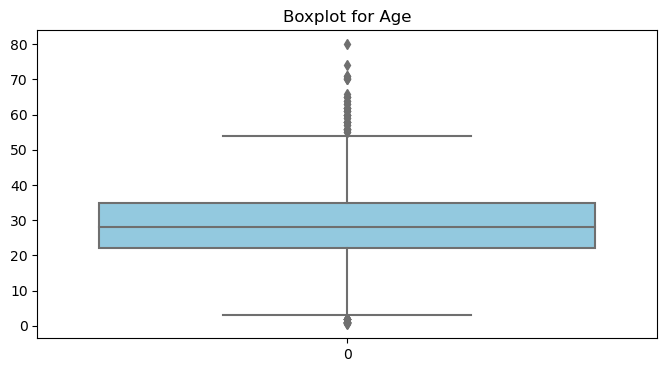

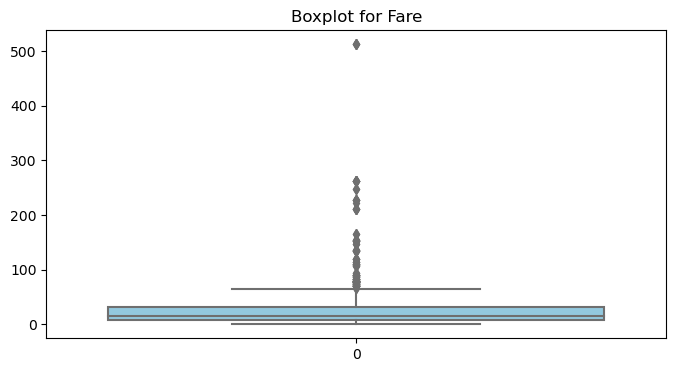

In [8]:
plot_boxplot(train_data, numerical_columns)

### Feature Engineering

In [9]:
# Converting categorical variables into numerical ones
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Ensuring that the test set has the same columns as the train set
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

### Checking the shape after feature engineering

In [10]:
print("\nData Shape After Outlier Removal:")
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Data Shape After Outlier Removal:
Train Data Shape: (891, 1727)
Test Data Shape: (418, 1727)


### Checking the column names after feature engineering

In [11]:
print("Columns in train_data:", train_data.columns)

Columns in train_data: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Cabin_Unknown', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1727)


### Preparing Features and Target

In [12]:
# Only dropping columns that exist in the dataset
columns_to_drop = [col for col in ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'] if col in train_data.columns]
X = train_data.drop(columns=columns_to_drop)
y = train_data['Survived']

columns_to_drop_test = [col for col in ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'] if col in test_data.columns]
X_test = test_data.drop(columns=columns_to_drop_test, errors='ignore')

In [13]:
# Confirming the shapes
print("\nShape of X (train features):", X.shape)
print("Shape of y (train target):", y.shape)
print("Shape of X_test (test features):", X_test.shape)


Shape of X (train features): (891, 1725)
Shape of y (train target): (891,)
Shape of X_test (test features): (418, 1725)


### Handling Class Imbalance with Stratified Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### Checking class distribution

In [17]:
print("\nClass distribution in training data:")
print(y_train.value_counts())
print("\nClass distribution in testing data:")
print(y_test.value_counts())


Class distribution in training data:
0    439
1    273
Name: Survived, dtype: int64

Class distribution in testing data:
0    110
1     69
Name: Survived, dtype: int64


### Plotting the distribution of classes

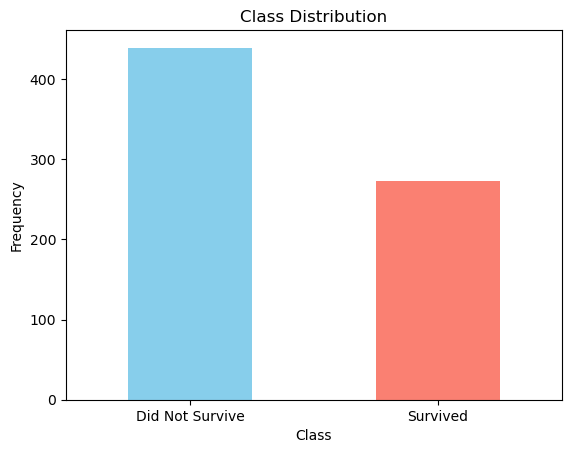

In [18]:
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()

## Machine Learning Model

### Defining the model

In [19]:
#Hyperparameter Tuning with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluating the Model on the Test Set

In [20]:
y_pred = dt_model.predict(X_test)

### The metrics

In [21]:
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy on Test Set: 0.7821229050279329

Confusion Matrix:
 [[96 14]
 [25 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.76      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



### Visualizing the Decision Tree

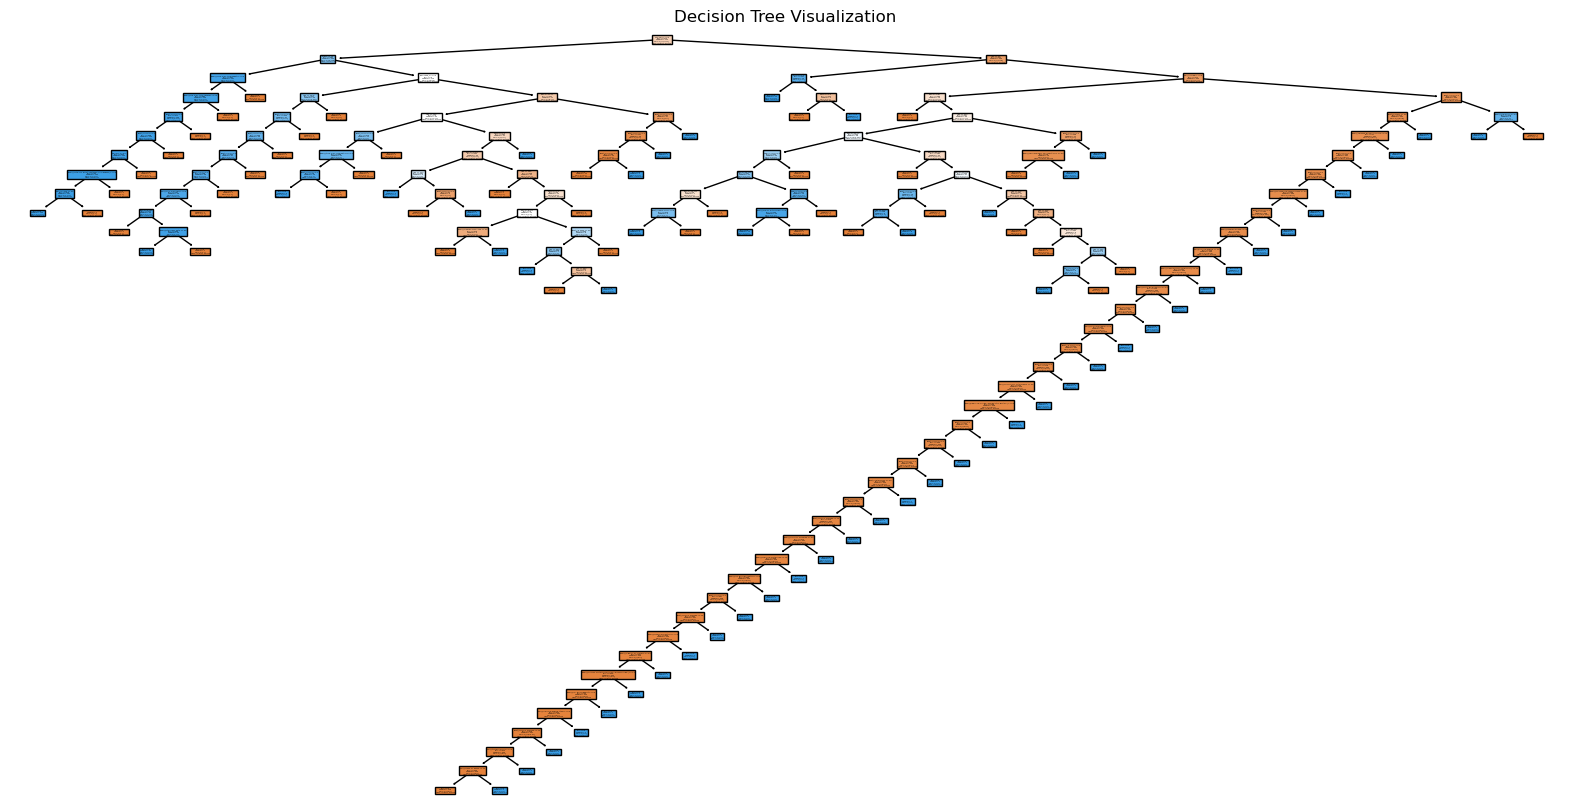

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=["Did Not Survive", "Survived"],
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()